# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and make dataframe

In [2]:
ds = datasets.load_diabetes()
ds.feature_names
df=pd.DataFrame(data = ds.data, columns= ds.feature_names)
df['target']= ds.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.to_excel('Data.xlsx',index=False)

In [ ]:
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Visualization

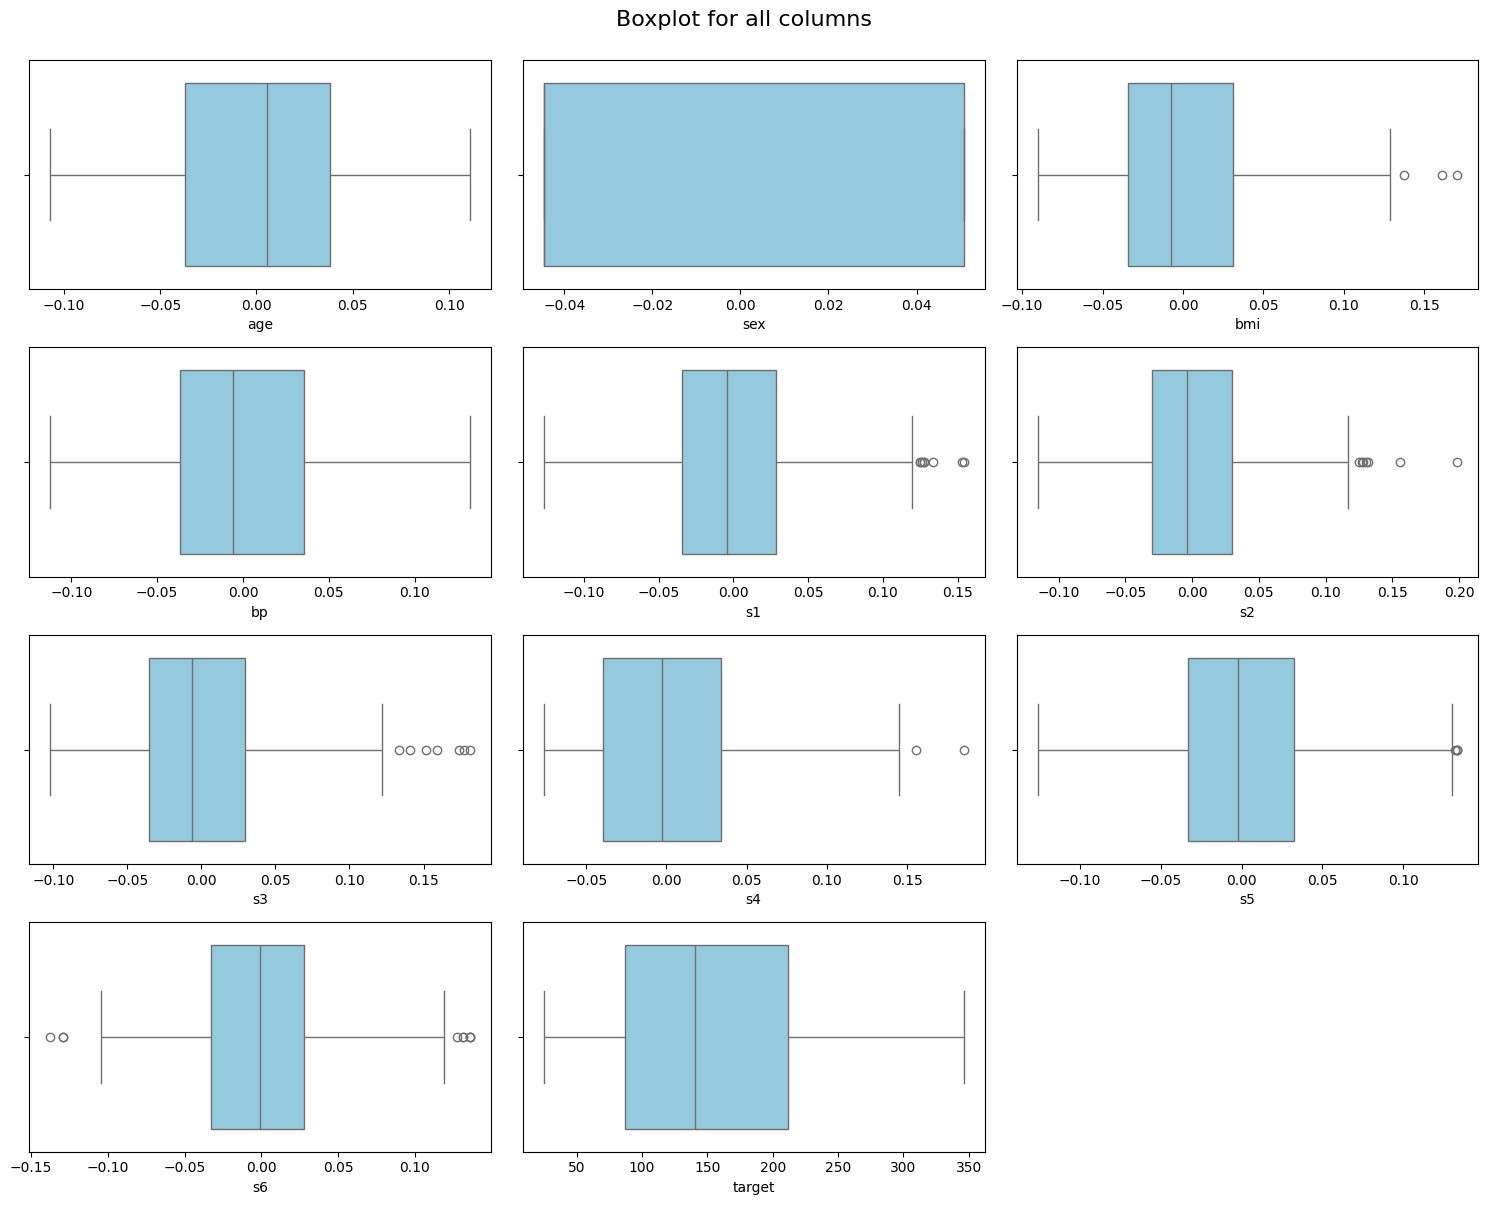

In [ ]:
ncols= 3
nrows= round(len(df.columns) / ncols)
fig, axes = plt.subplots(nrows=nrows ,ncols=ncols, figsize= (15, 3*nrows))
fig.suptitle('Boxplot for all columns', fontsize = 16, y= 1.0)
axes = axes.flatten()
for i, col in enumerate(df.columns):
  sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
  # axes[i].set_xlabel(f'{col}')
  # axes[i].set_ylabel('Count')

# Hide unused subplots
for j in range(i+1, len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

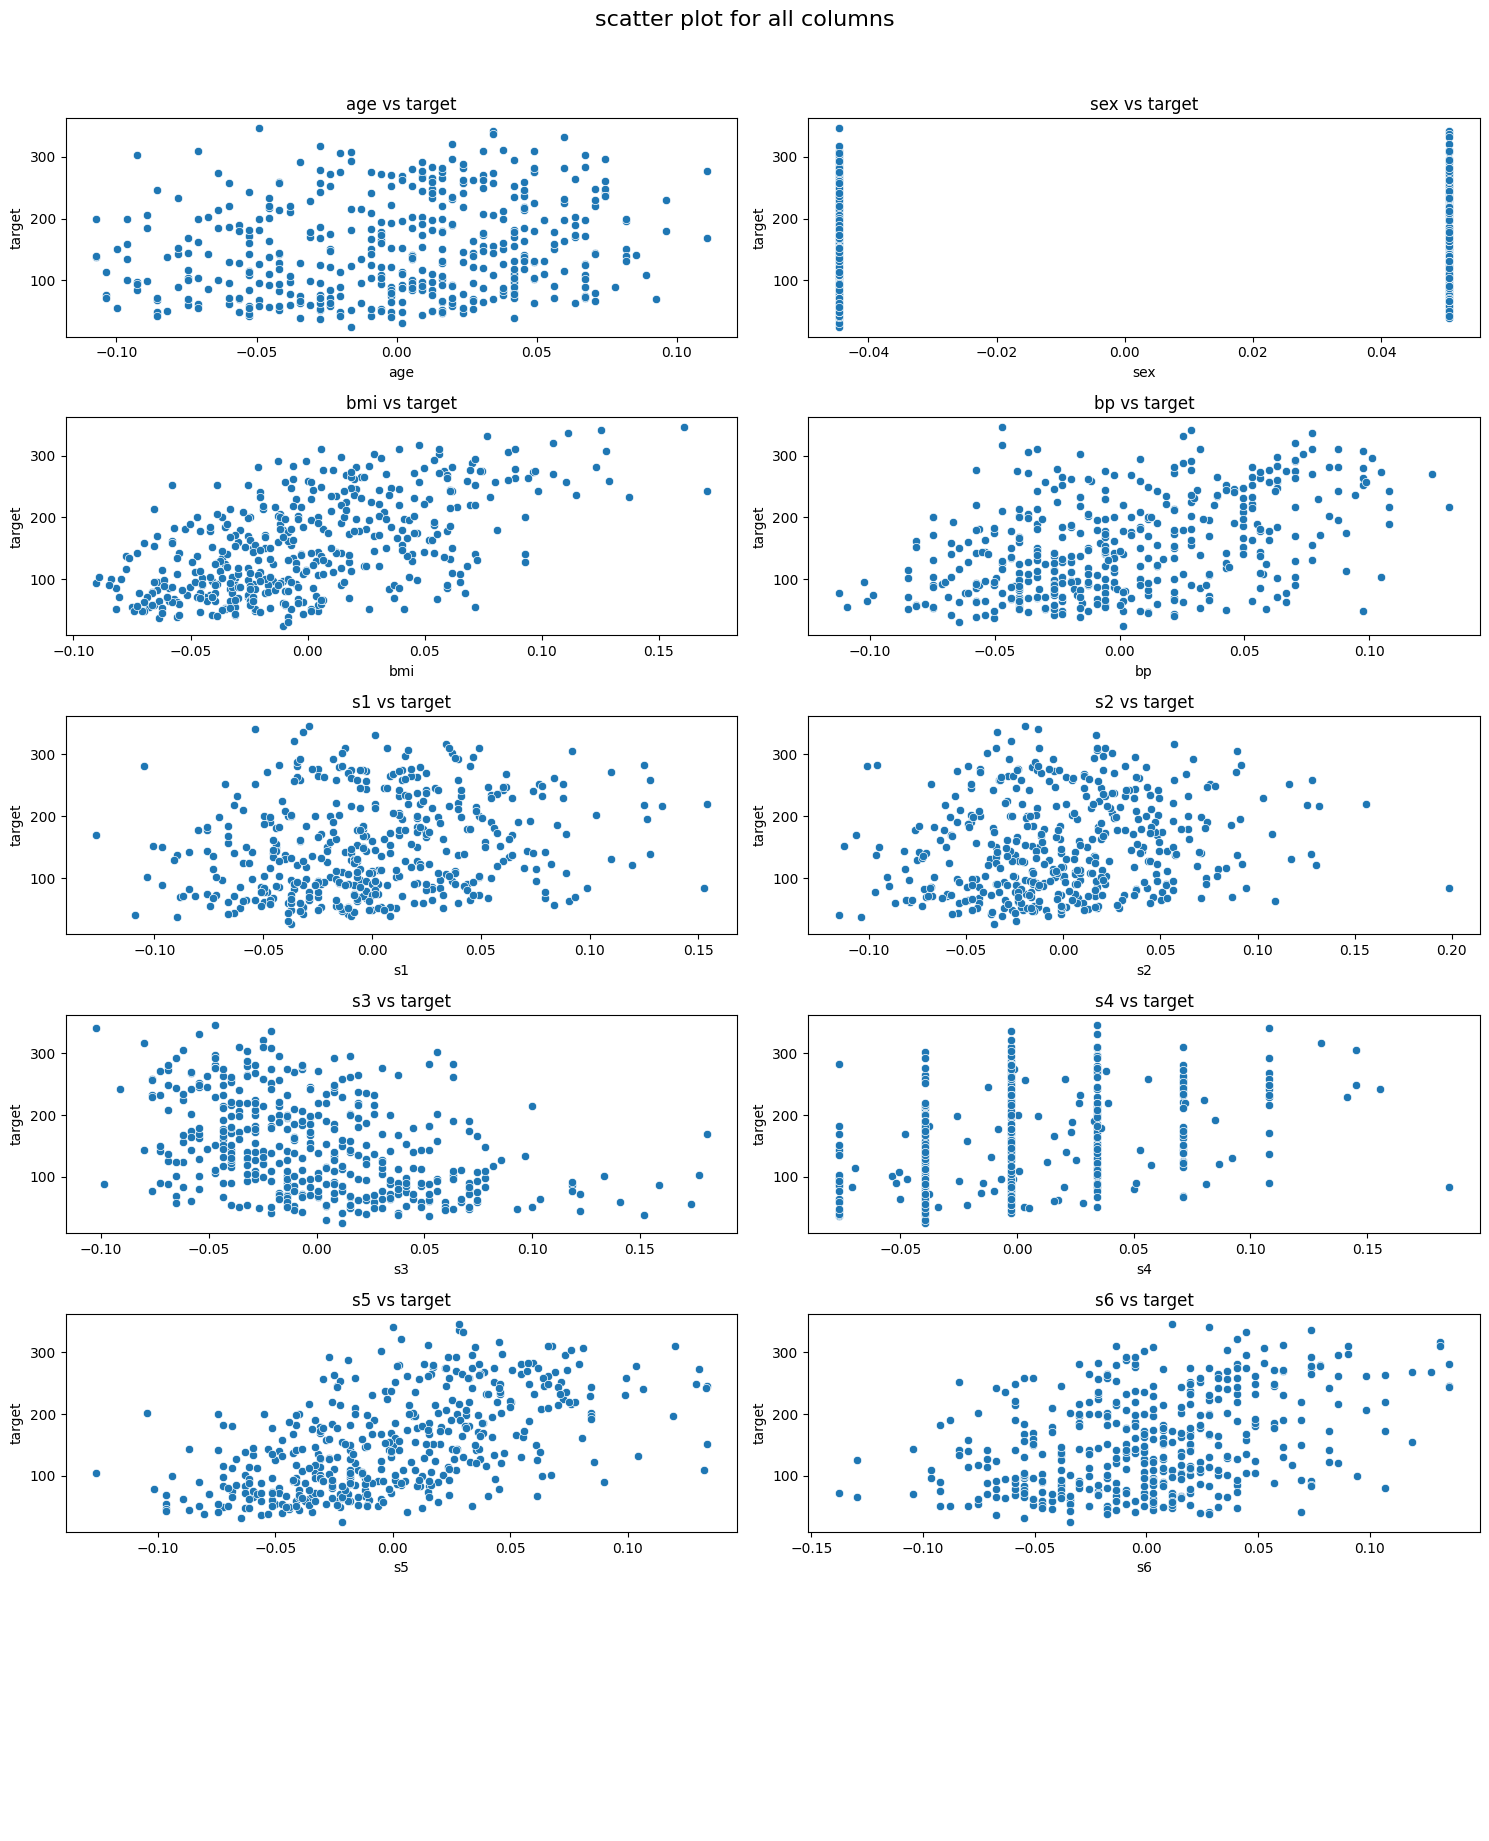

In [ ]:
ncols= 2
nrows= round(len(df.columns) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols= ncols, figsize=(15,3*nrows))
fig.suptitle('scatter plot for all columns', fontsize=16, y=1.02)
axes= axes.flatten()
for i, col in enumerate(df.columns):
  if col!= 'target':
    sns.scatterplot(x= df[col], y=df['target'], ax=axes[i])
    axes[i].set_title(f'{col} vs target')

for j in range(i,len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

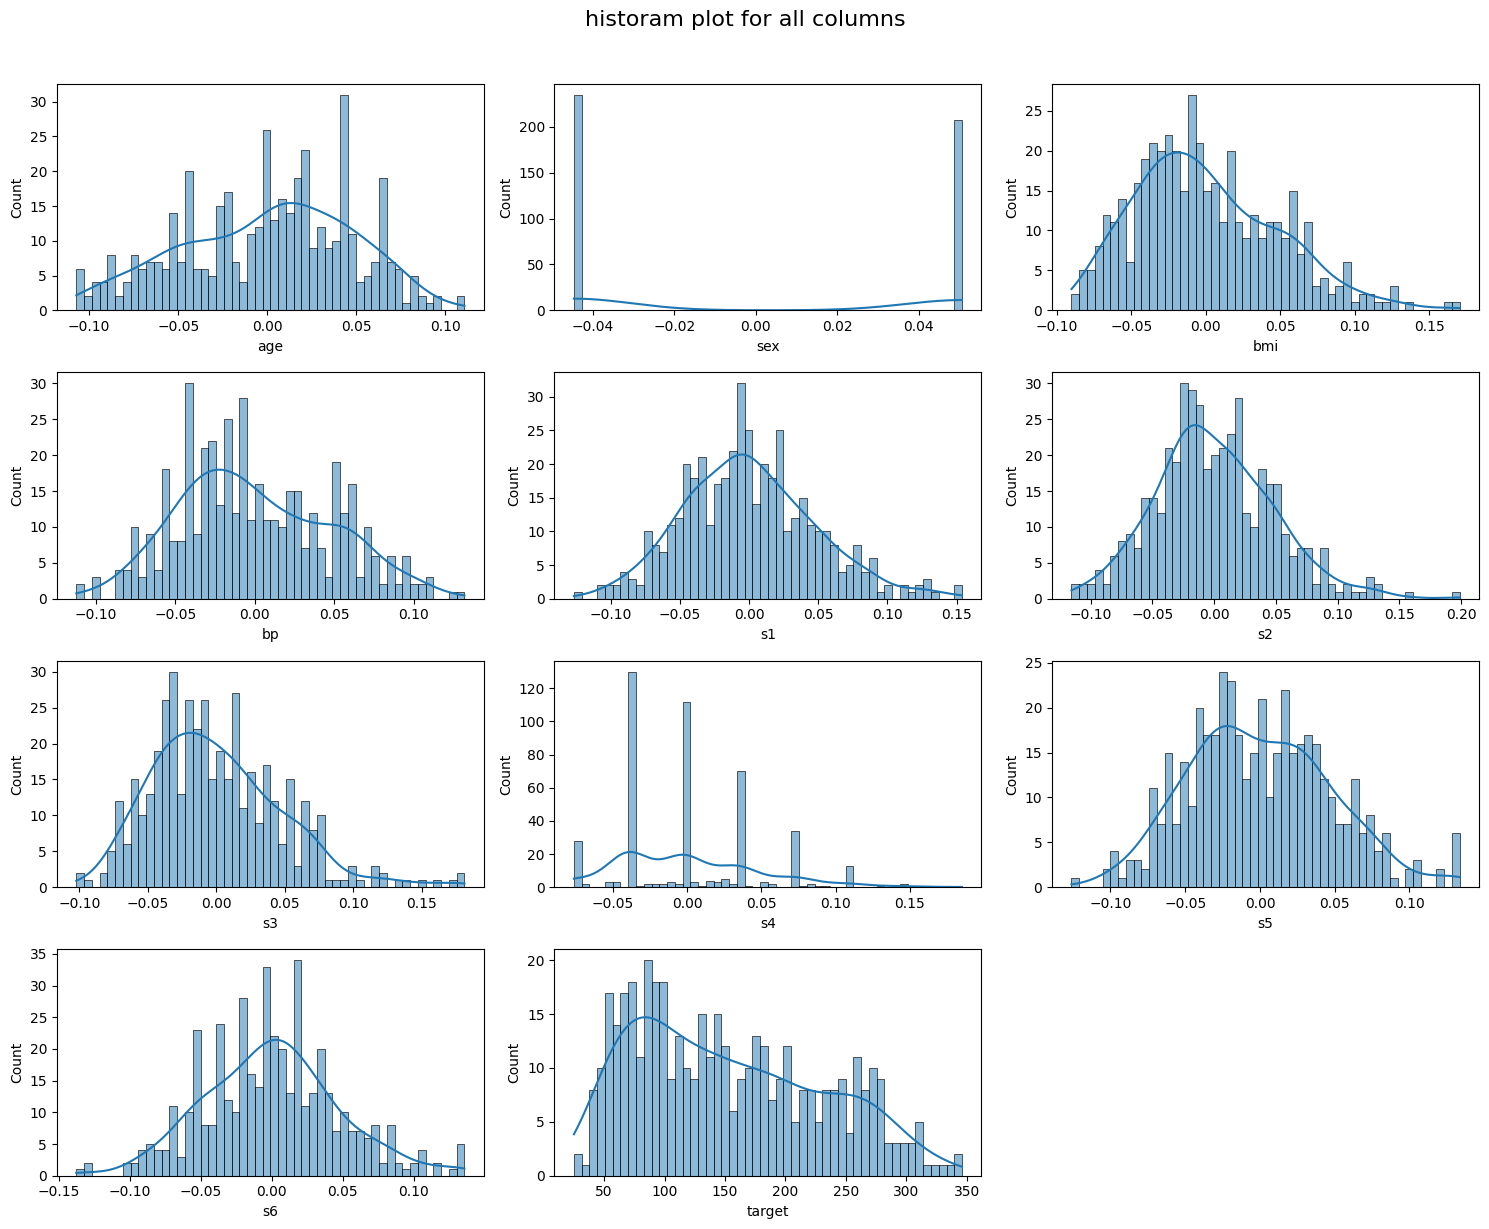

In [ ]:
ncols=3
nrows= round(len(df.columns) / ncols)
fig ,axes= plt.subplots(nrows= nrows, ncols=ncols, figsize= (15, 3*nrows))
fig.suptitle('historam plot for all columns', fontsize= 16, y=1.02)
axes= axes.flatten()
for i, col in enumerate(df.columns):
  sns.histplot(df[col], bins=50, edgecolor='black', kde= True, ax= axes[i])

for j in range(i+1 , len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

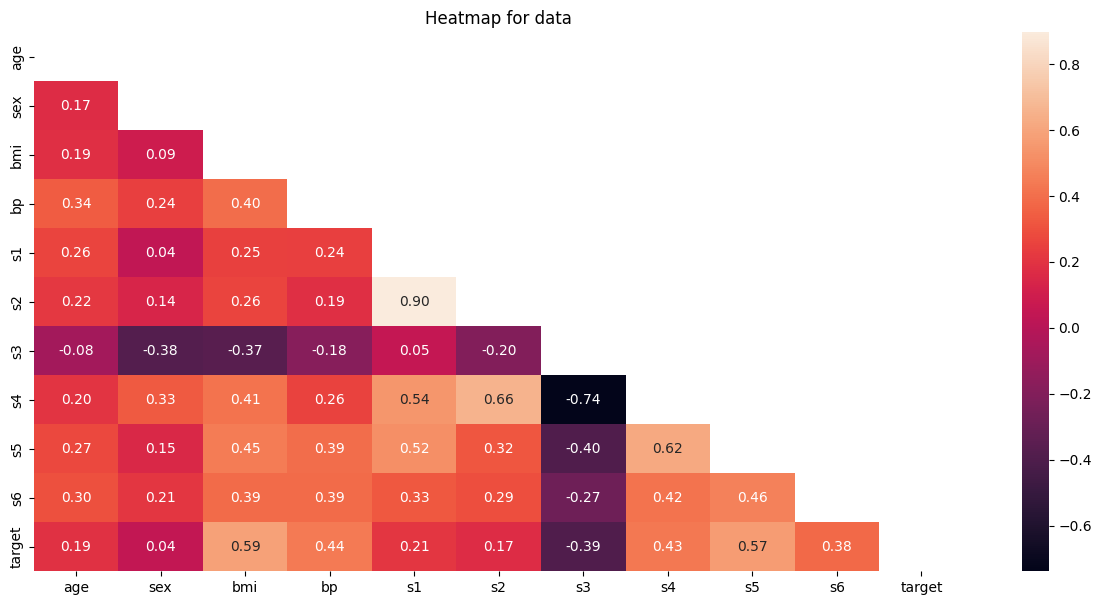

In [ ]:
# triangle heatmap
# fig=plt.subplots(figsize = (15,7))
# corr=df.corr()
# mask= np.triu(np.ones_like(corr, dtype= bool))
# sns.heatmap(corr, annot = True, square= False, fmt = '.2f', mask= mask)
# plt.title('Heatmap for data')
# plt.show()

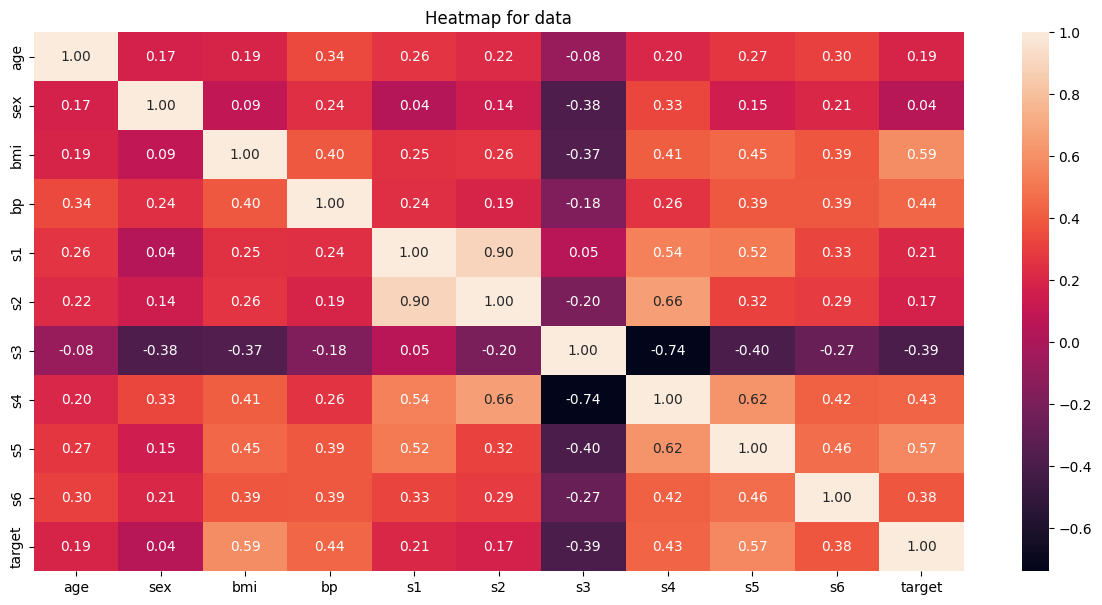

In [ ]:
fig=plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, square= False, fmt = '.2f')
plt.title('Heatmap for data')
plt.show()

# Linear_Regression class - single variable - without data spliting

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Generate data for LinearRegression/single (bmi) variable
# X= np.array([df['bmi']]).reshape(-1,1)
# y= np.array(df['target'])

X= df[['bmi']]
y= df['target']

# Generate Model
model= LinearRegression()
model.fit(X,y)
print(f"Equation is: y = {model.intercept_:.4f} + {(model.coef_)[0]:.4f} * BMI")

# Evaluate Model
y_pred= model.predict(X)
mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")


Equation is: y = 152.1335 + 949.4353 * BMI
 MSE = 3890.456585461273
 R2 = 0.3439237602253802


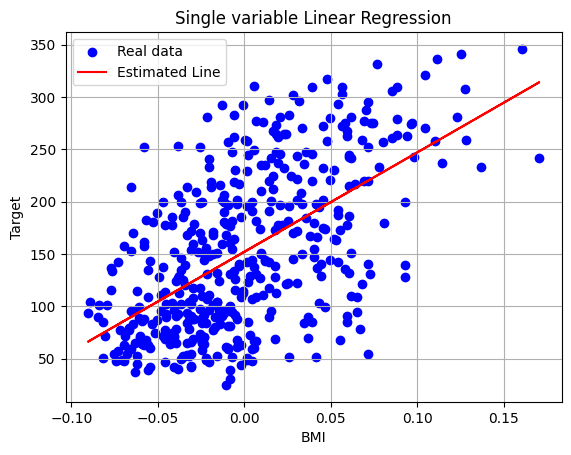

In [50]:
# Plot model
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color= 'red')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Single variable Linear Regression')
plt.legend(['Real data', 'Estimated Line'])
plt.grid(True)
plt.show()

# Normal Equation - single variable

 MSE = 27035.053589003444
 R2 = -3.559119453244257


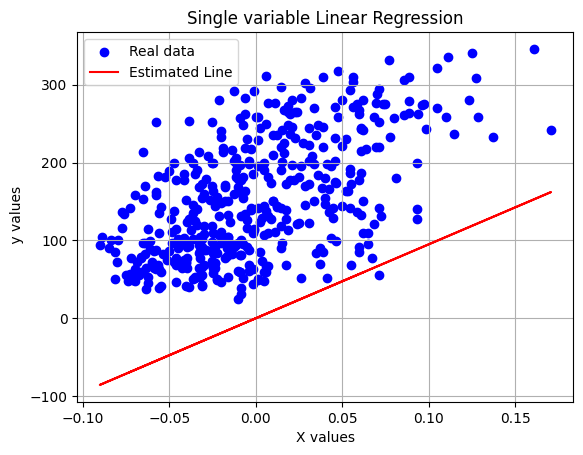

In [33]:
# Normal equation:  Ax=b,  AT.Ax=AT.b.

def normal_equation (X,y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

def mean_squared_error (y_true, y_predict):
  return np.mean((y_true - y_predict) ** 2)

def r2_score(y_true, y_pred):
  SS_Residual= np.sum((y_true - y_pred) ** 2)
  SS_Total= np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - (SS_Residual / SS_Total)

# Generate data for LinearRegression/single (bmi) variable
X= np.array([df['bmi']]).reshape(-1,1)
y= np.array(df['target'])

theta= normal_equation(X,y)

y_pred=np.dot(X,theta)

mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

# Plot model
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color= 'red')
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('Single variable Normal Equation')
plt.legend(['Real data', 'Estimated Line'])
plt.grid(True)
plt.show()

# Gradian descent - single variable

 MSE = 29073.55929085859
 R2 = -3.902887627044268


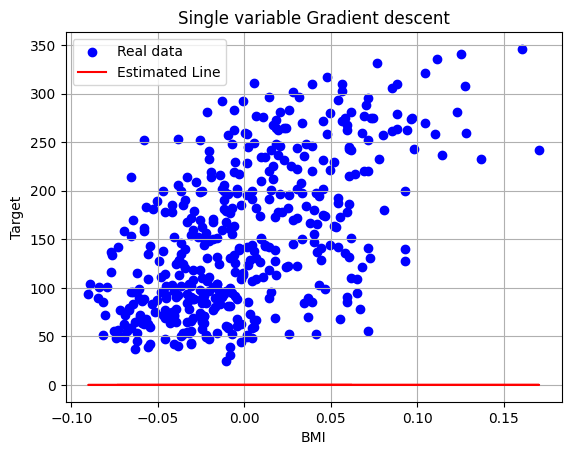

In [51]:

def hypothesis (theta,X):
  return np.dot(X, theta)

def cost_fuction(theta, X, y):
  m= len(y)
  J=np.sum((hypothesis(theta,X) - y) ** 2) / (2 * m)
  return J

def Gradient_descent(theta, X, y, learning_rate, iterations):
  m=len(y)
  cost_history=np.zeros(iterations)
  for i in range(iterations):
    gradient= np.dot(X.T,(hypothesis(theta,X) - y)) / m
    theta= theta - (learning_rate * gradient)
    cost_history[i]= cost_fuction(theta, X, y)
  return theta, cost_history

def mean_squared_error (y_true, y_predict):
  return np.mean((y_true - y_predict) ** 2)

def r2_score(y_true, y_pred):
  SS_Residual= np.sum((y_true - y_pred) ** 2)
  SS_Total= np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - (SS_Residual / SS_Total)

# Generate data for LinearRegression/single (bmi) variable
# X= np.array([df['bmi']]).reshape(-1,1)
# y= np.array(df['target'])
X= df[['bmi']]
y=df['target']

initia_theta= np.zeros(X.shape[1])
learning_rate= .0001
iterations= 1000

theta, cost_history = Gradient_descent(initia_theta, X, y, learning_rate, iterations)


y_pred=hypothesis(theta, X)

mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)

print(f" MSE = {mse}")
print(f" R2 = {r2}")

# Plot model
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color= 'red')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Single variable Gradient descent')
plt.legend(['Real data', 'Estimated Line'])
plt.grid(True)
plt.show()

# Linear_Regression class - two variable - without spliting

Equation is: y = 152.1335 + 675.0714 * BMI + 614.9499 * s5
 MSE = 3205.1900768248533
 R2 = 0.45948527963926633


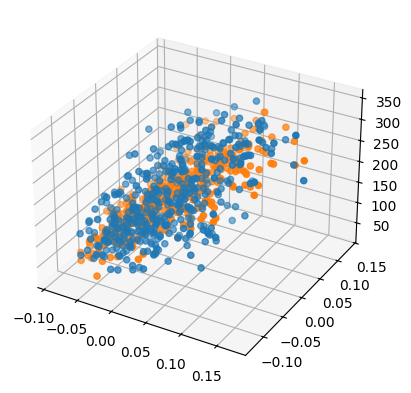

In [65]:
X= df[['bmi', 's5']]
y= df['target']

# Generate Model
model= LinearRegression()
model.fit(X,y)
print(f"Equation is: y = {model.intercept_:.4f} + {(model.coef_)[0]:.4f} * BMI + {(model.coef_)[1]:.4f} * s5")

# Evaluate Model
y_pred= model.predict(X)
mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

# Drew plot
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(X['bmi'], X['s5'], y)
ax.scatter(X['bmi'], X['s5'], y_pred)
plt.show()

# Linear_Regression class - multi variable - with spliting

In [66]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [68]:
from sklearn.model_selection import train_test_split

X= df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y= df['target']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Generate Model
model= LinearRegression()
model.fit(X_train,y_train)
print(f"Equation is: y = {model.intercept_:.4f} + {(model.coef_)[0]:.4f} * AGE + {(model.coef_)[1]:.4f} * SEX + {(model.coef_)[2]:.4f} * MBI + {(model.coef_)[3]:.4f} * bp + {(model.coef_)[4]:.4f} * S1 + {(model.coef_)[5]:.4f} * S2 + {(model.coef_)[6]:.4f} * S3 + {(model.coef_)[7]:.4f} * S4 + {(model.coef_)[8]:.4f} * S5 + {(model.coef_)[9]:.4f} * S6")

# Evaluate Model
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")


Equation is: y = 151.3456 + 37.9040 * AGE + -241.9644 * SEX + 542.4288 * MBI + 347.7038 * bp + -931.4888 * S1 + 518.0623 * S2 + 163.4200 * S3 + 275.3179 * S4 + 736.1989 * S5 + 48.6707 * S6
 MSE = 2900.193628493482
 R2 = 0.4526027629719195
